# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
df_hh_income.shape
df_hh_income.columns
df_hh_income.isna().any()

Geographic Area    False
City               False
Median Income       True
dtype: bool

In [6]:
df_pct_poverty.shape
df_pct_poverty.columns
df_pct_poverty.isna().any()

Geographic Area    False
City               False
poverty_rate       False
dtype: bool

In [7]:
df_pct_completed_hs.shape
df_pct_completed_hs.columns
df_pct_completed_hs.isna().any()

Geographic Area         False
City                    False
percent_completed_hs    False
dtype: bool

In [8]:
df_share_race_city.shape
df_share_race_city.columns
df_share_race_city.isna().any()

Geographic area          False
City                     False
share_white              False
share_black              False
share_native_american    False
share_asian              False
share_hispanic           False
dtype: bool

In [9]:
df_fatalities.shape
df_fatalities.columns
df_fatalities.isna().any()

id                         False
name                       False
date                       False
manner_of_death            False
armed                       True
age                         True
gender                     False
race                        True
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                        True
body_camera                False
dtype: bool

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [10]:
df_hh_income.fillna(0, inplace=True)
df_hh_income.isna().any()

Geographic Area    False
City               False
Median Income      False
dtype: bool

In [11]:
df_fatalities.fillna(0, inplace=True)
df_fatalities.isna().any()

id                         False
name                       False
date                       False
manner_of_death            False
armed                      False
age                        False
gender                     False
race                       False
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                       False
body_camera                False
dtype: bool

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [12]:
df_pct_poverty.columns
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')

state_poverty = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending=False)
state_poverty

Geographic Area
MS   26.88
AZ   25.67
GA   23.78
NM   23.08
AR   22.96
LA   22.34
SC   22.16
WV   21.13
OK   20.66
AL   20.65
MO   20.11
KY   20.08
TX   19.92
TN   19.89
AK   19.85
NC   19.75
ID   18.24
DC   18.00
MI   17.90
FL   17.57
CA   17.12
ME   16.89
OR   16.52
MT   16.51
SD   16.03
IN   15.50
WA   15.02
OH   14.85
KS   14.76
VA   14.59
IL   13.88
VT   13.79
MN   13.75
HI   13.40
CO   13.36
NE   12.98
WI   12.86
NH   12.66
DE   12.56
PA   12.52
NV   12.47
IA   12.29
ND   12.16
UT   11.98
NY   11.67
RI   10.37
MD   10.31
WY    9.89
MA    9.59
CT    9.14
NJ    8.19
Name: poverty_rate, dtype: float64

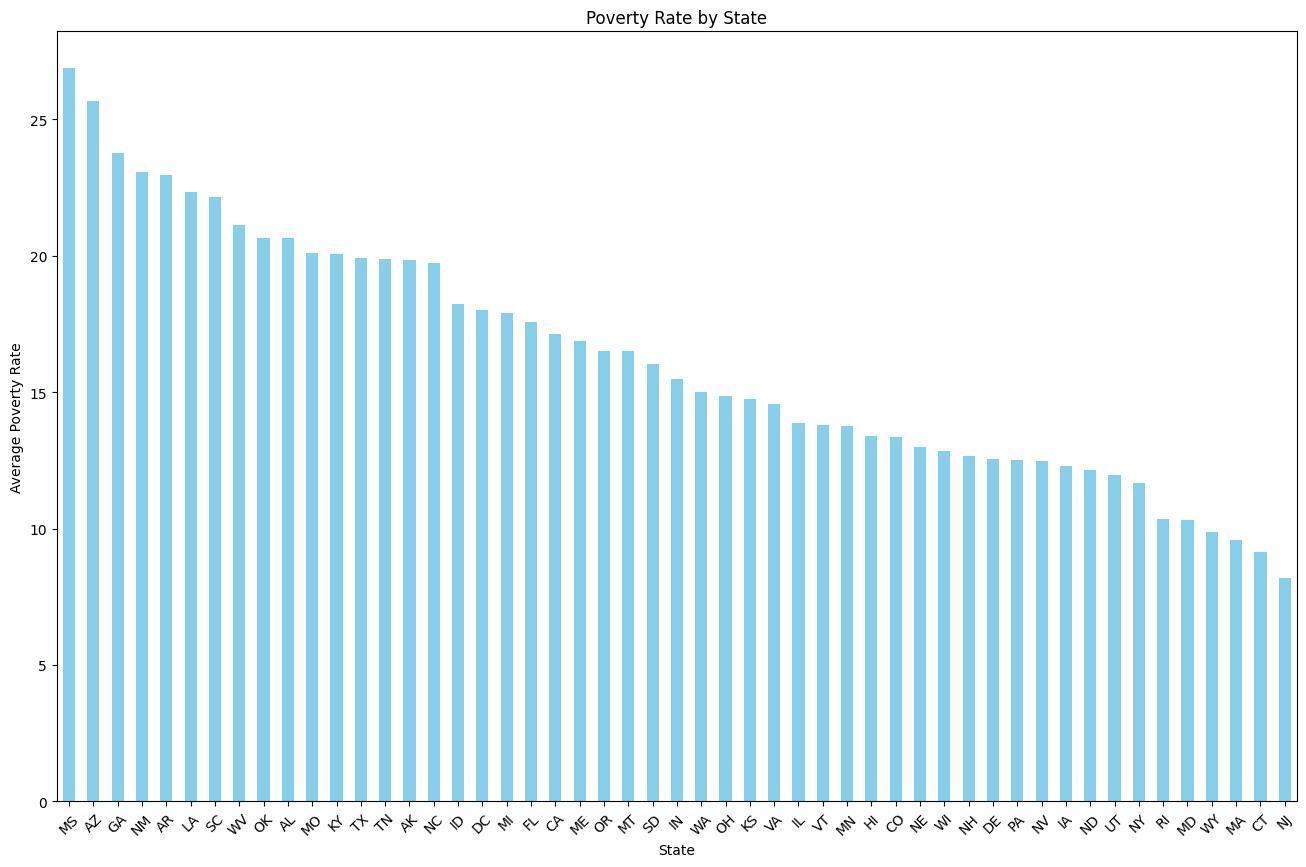

In [13]:
plt.figure(figsize=(16,10))
state_poverty.plot(kind='bar', color='skyblue')
plt.title('Poverty Rate by State')
plt.xlabel('State')
plt.ylabel('Average Poverty Rate')
plt.xticks(rotation=45)
plt.show()


# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

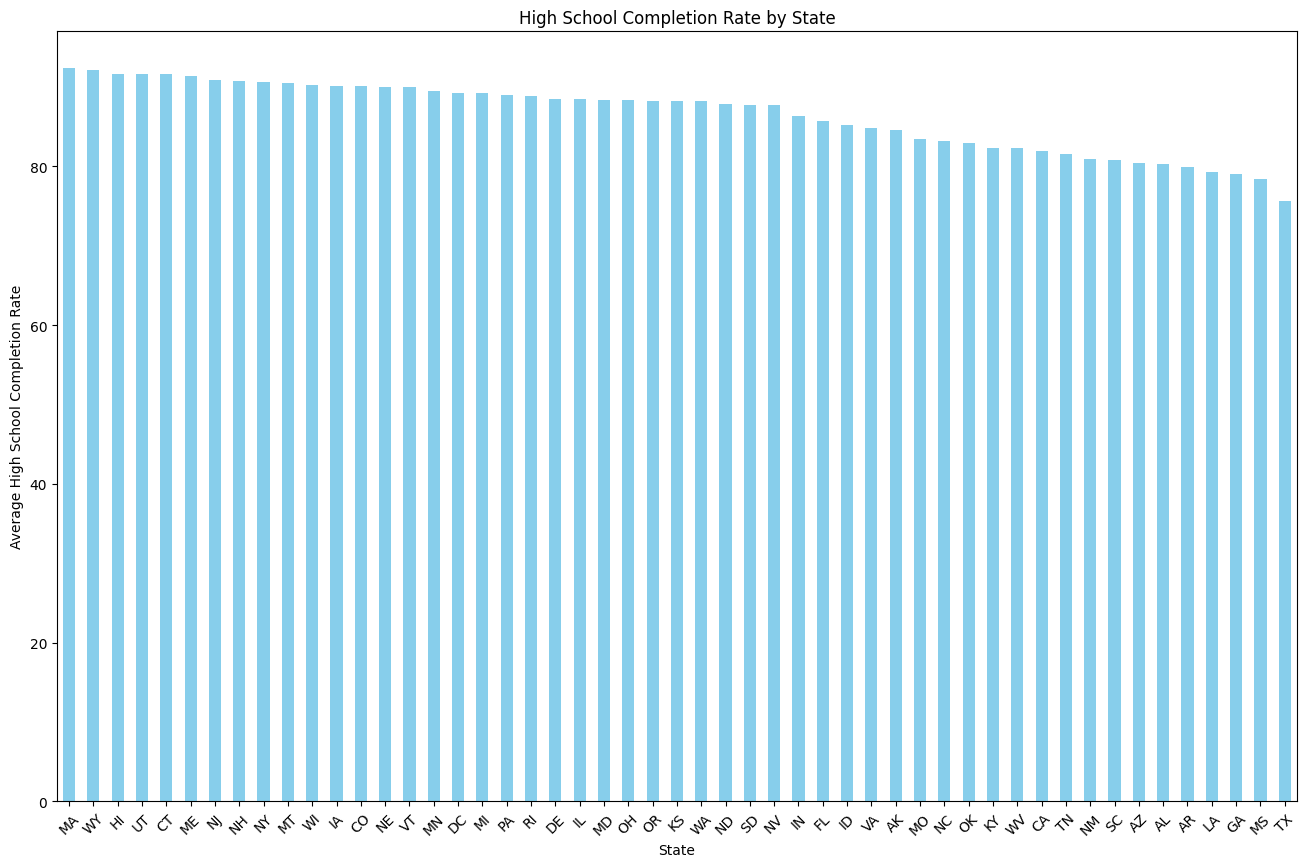

In [14]:
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')
df_pct_completed_hs.dtypes

state_completed_hs = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().sort_values(ascending=False)

plt.figure(figsize=(16,10))
state_completed_hs.plot(kind='bar', color='skyblue')
plt.title('High School Completion Rate by State')
plt.xlabel('State')
plt.ylabel('Average High School Completion Rate')
plt.xticks(rotation=45)
plt.show()



# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [15]:
# This time, don't sort it!
state_poverty = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean()
state_hs_completion = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean()


# Align the indices
aligned_data = pd.concat([state_poverty, state_hs_completion], axis=1)


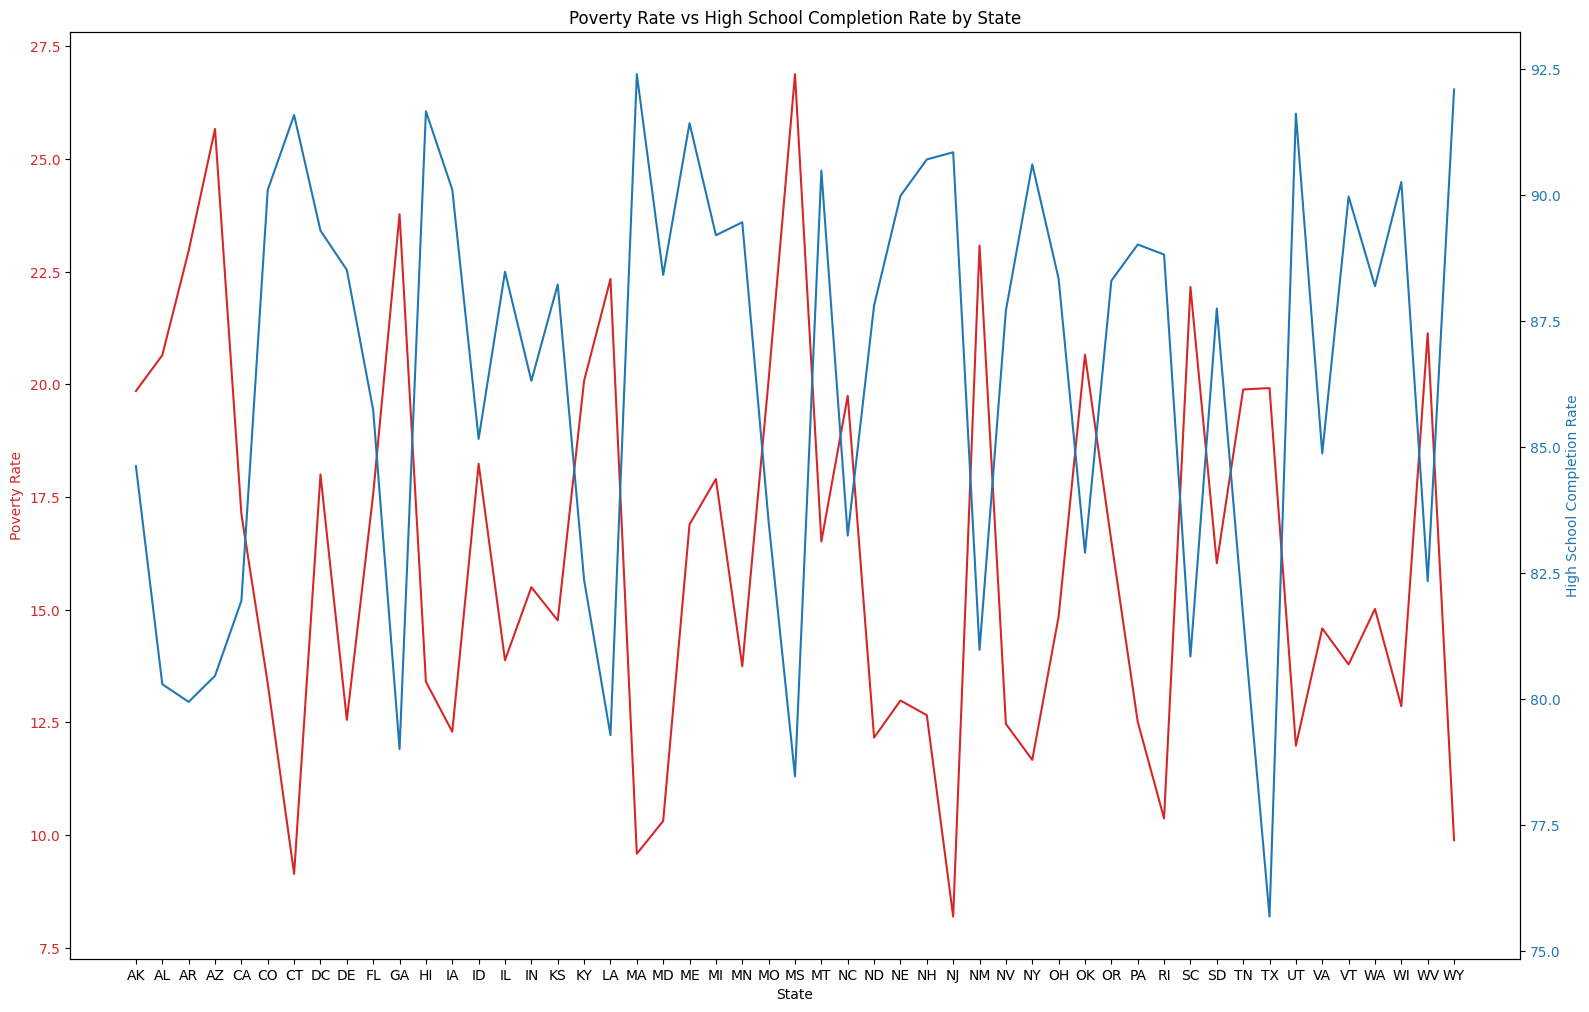

In [16]:

fig, ax1 = plt.subplots(figsize=(16,10))

ax1.set_xlabel('State')
ax1.set_ylabel('Poverty Rate', color='tab:red')
ax1.plot(aligned_data.index, aligned_data['poverty_rate'], color='tab:red', label='Poverty Rate')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx() # same as before (state)
ax2.set_ylabel('High School Completion Rate', color='tab:blue')
ax2.plot(aligned_data.index, aligned_data['percent_completed_hs'], color='tab:blue', label='High School Completion Rate')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()
plt.title('Poverty Rate vs High School Completion Rate by State')
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [17]:
# Merge the DataFrames on 'Geographic Area' and 'City'
merged_df = pd.merge(df_pct_poverty, df_pct_completed_hs, on=['Geographic Area', 'City'])


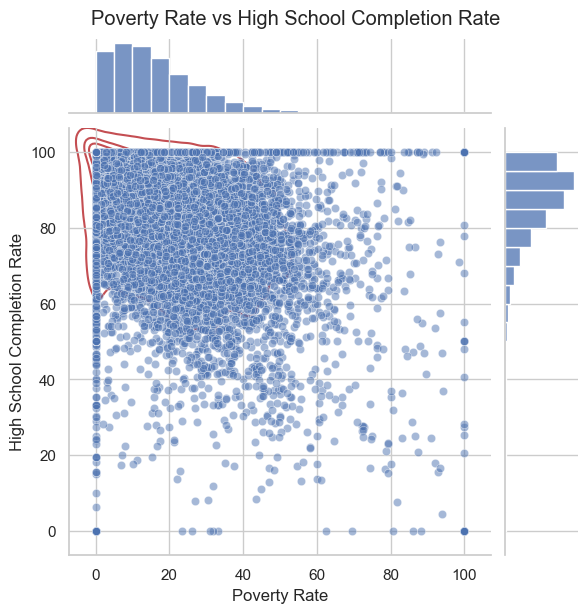

In [18]:
sns.set_theme(style="whitegrid")
joint_plot = sns.jointplot(
    data=merged_df,
    x='poverty_rate',
    y='percent_completed_hs',
    kind='scatter',
    marginal_kws=dict(bins=20, fill=True),
    joint_kws=dict(alpha=0.5)
)
joint_plot = joint_plot.plot_joint(sns.kdeplot, color='r', zorder=0, levels=6)

plt.suptitle('Poverty Rate vs High School Completion Rate', y=1.02)
plt.xlabel('Poverty Rate')
plt.ylabel('High School Completion Rate')
plt.show()


#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

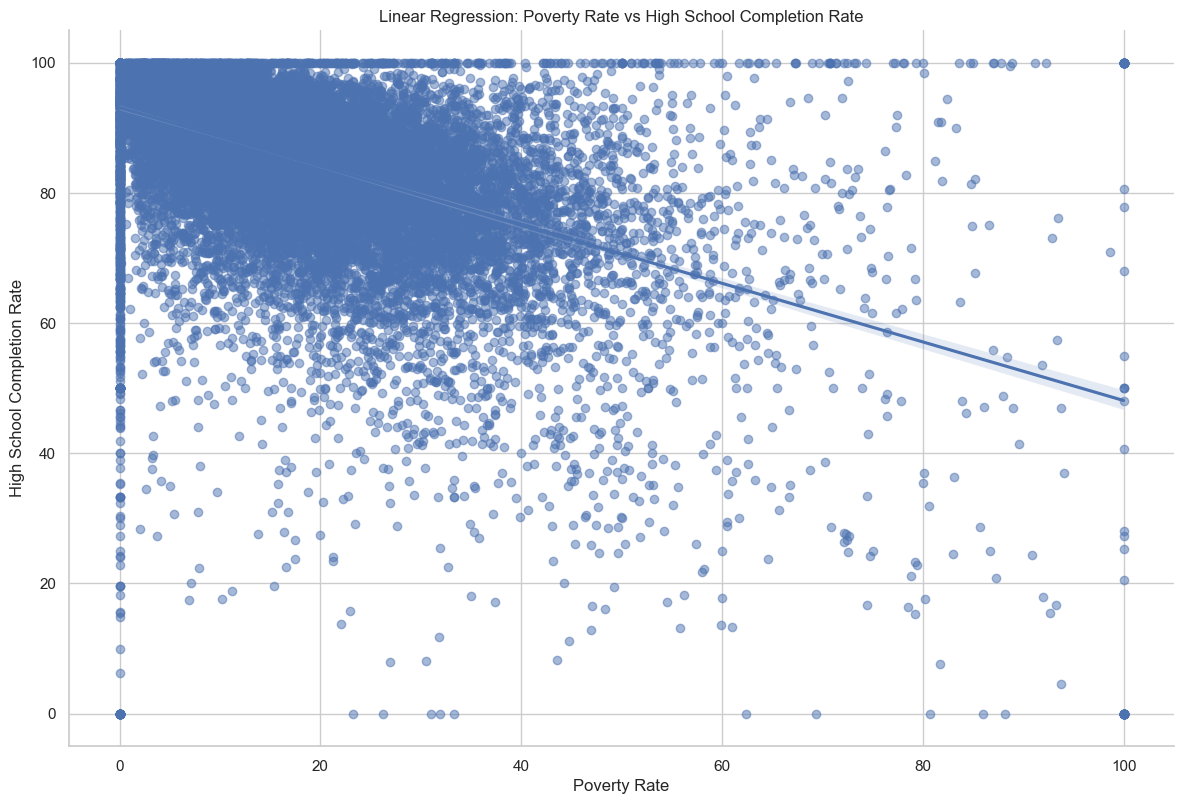

In [19]:
sns.set_theme(style="whitegrid")
lm_plot = sns.lmplot(
    data=merged_df,
    x='poverty_rate',
    y='percent_completed_hs',
    aspect=1.5,
    height=8,
    scatter_kws={'alpha':0.5}
)

lm_plot.set_axis_labels('Poverty Rate', 'High School Completion Rate')
plt.title('Linear Regression: Poverty Rate vs High School Completion Rate')

plt.show()



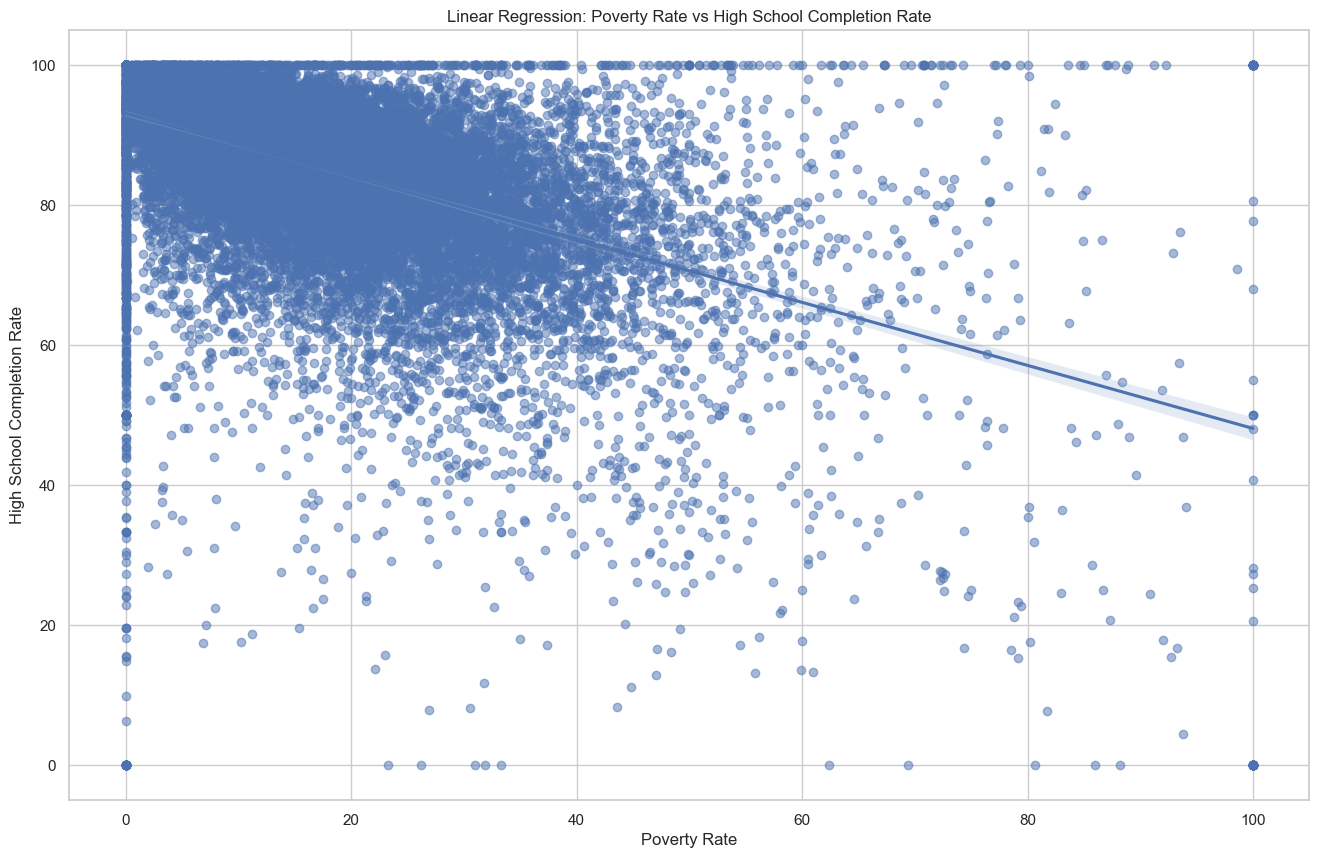

In [20]:
plt.figure(figsize=(16,10))
sns.regplot(
    data=merged_df,
    x='poverty_rate',
    y='percent_completed_hs',
    scatter_kws={'alpha':0.5},
    #line_kws={'color':'red'}
)
plt.xlabel('Poverty Rate')
plt.ylabel('High School Completion Rate')
plt.title('Linear Regression: Poverty Rate vs High School Completion Rate')
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [21]:
# Convert the relevant columns to numeric
for column in ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']:
    df_share_race_city[column] = pd.to_numeric(df_share_race_city[column], errors='coerce')

""" print(df_share_race_city.dtypes)
print(df_share_race_city.head())
print(df_share_race_city.isna().any()) """

state_racial_makeup = df_share_race_city.groupby('Geographic area').mean(numeric_only=True)


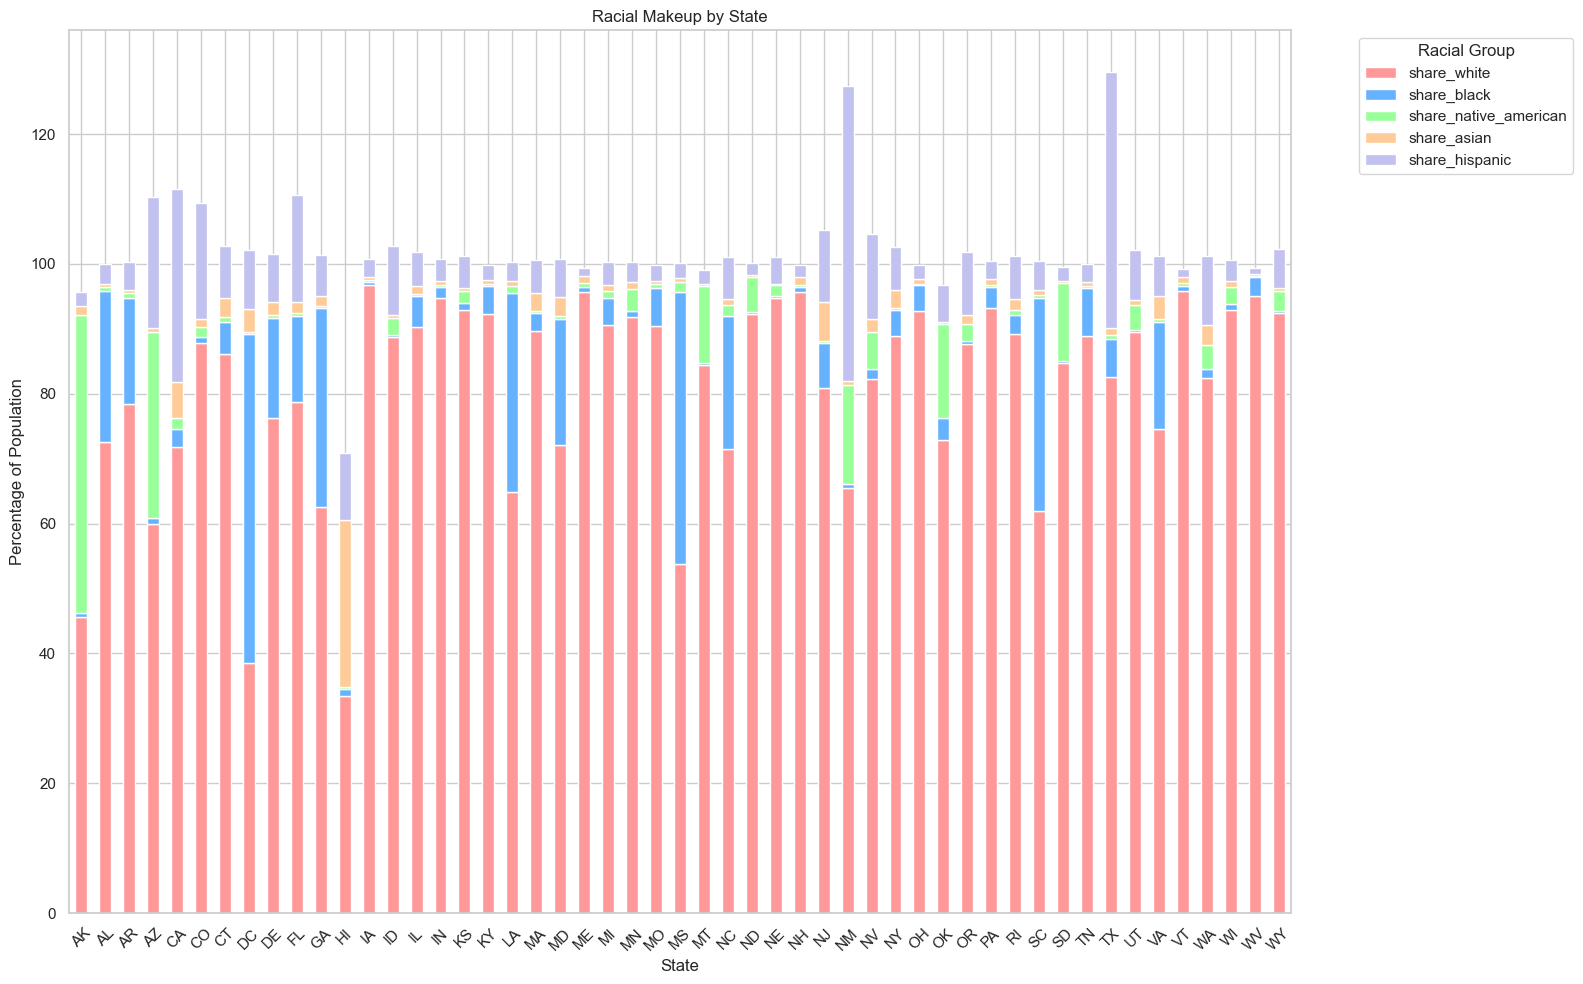

In [22]:
fig, ax = plt.subplots(figsize=(16,10))

state_racial_makeup.plot(kind='bar', stacked=True, ax=ax, color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#c2c2f0'])

plt.title('Racial Makeup by State')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.ylabel('Percentage of Population')
plt.legend(title='Racial Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [23]:
race_counts = df_fatalities['race'].value_counts().reset_index()
race_counts.columns = ['race', 'count']

In [24]:
import plotly.express as px

fig = px.pie(
    race_counts,
    names='race',
    values='count',
    hole=0.4,
    title='Distribution of Fatal Police Shootings by Race'
)

fig.update_layout(
    showlegend=True,
    legend_title='Race',
    title={'text': 'Distribution of People Killed by Police by Race', 'x':0.5},
    annotations=[dict(text='Race', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [25]:
gender_counts = df_fatalities['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count'] # not really necessary, but it's good practice


In [26]:
fig = px.bar(
    gender_counts,
    x='gender',
    y='count',
    title='Total Number of Fatal Police Shootings by Gender',
    labels={'count': 'Number of Fatal', 'gender': 'Gender'},
    color='gender',
    text='count'
)

fig.update_layout(
    xaxis_title='Gender',
    yaxis_title='Number of Fatal Shootings',
    title={'text': 'Total Number of Deaths by Gender', 'x':0.5},
    barmode='stack',
    showlegend=False
)

fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [27]:
fig = px.box(
    df_fatalities,
    x='manner_of_death',
    y='age',
    title='Box Plot of Death by Police Shootings by Age',
    labels={'age': 'Age', 'manner_of_death': 'Manner of Death'}
)
fig.update_layout(
    xaxis_title='Manner of Death',
    yaxis_title='Age',
    title={'text': 'Box Plot of Deaths by Police Shootings by Age', 'x':0.5},
    boxmode='overlay'
)

fig.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [28]:
armed_count = df_fatalities['armed'].where(df_fatalities['armed'] != 'unarmed').count()
total_count = df_fatalities.shape[0]

percentage_armed = (armed_count / total_count) * 100

print(f'Total number of people killed by police: {total_count},\nNumber of people armed: {armed_count}\nThat is {percentage_armed:.2f}% were armed.')


Total number of people killed by police: 2535,
Number of people armed: 2364
That is 93.25% were armed.


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [29]:
young_people = df_fatalities[df_fatalities['age'] < 25]
total_count = df_fatalities.shape[0]
percentage_young = (young_people.shape[0] / total_count) * 100

print(f'{percentage_young:.2f}% of people killed by police were under 25 years old.')

20.79% of people killed by police were under 25 years old.


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

In [30]:
# Verify DataFrame columns and data
print("DataFrame Columns:", df_fatalities.columns)
print("DataFrame Info:\n", df_fatalities.info())
print("DataFrame Head:\n", df_fatalities.head())

# Ensure 'age' column is numeric
print("Data types:\n", df_fatalities.dtypes)


DataFrame Columns: Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2535 non-null   object 
 5   age                      2535 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2535 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_ill

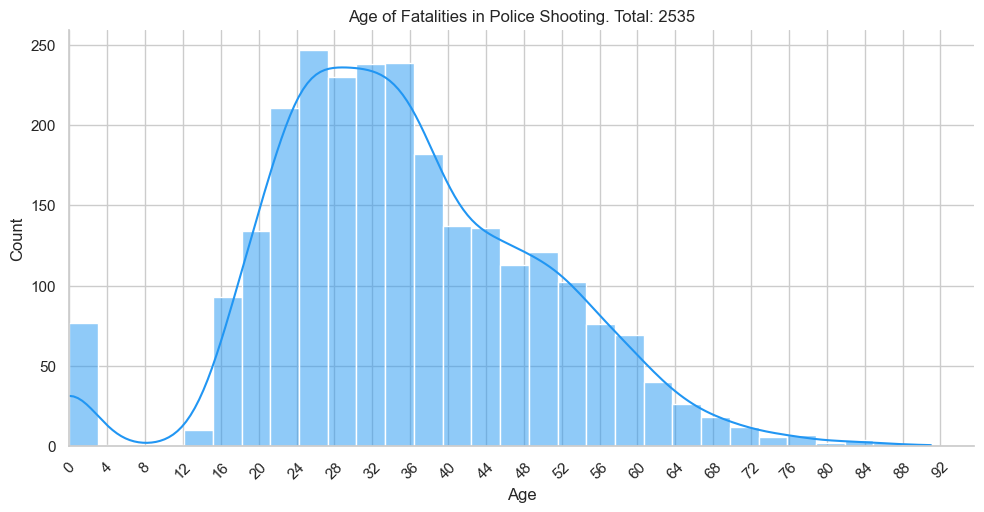

In [45]:
total_count = df_fatalities['age'].count()

sns.displot(
    df_fatalities['age'],
    bins=30,
    aspect=2,
    kde=True,
    color='#2196f3'
    )

plt.title(f'Age of Fatalities in Police Shooting. Total: {total_count}')
plt.xlabel('Age')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(30))  # Limit the number of x-ticks to 10
plt.xlim(left=0)  # Set the left limit of the x-axis to 0

plt.ylabel('Count')

plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

No legend handles found. Ensure 'hue' parameter is correctly used.


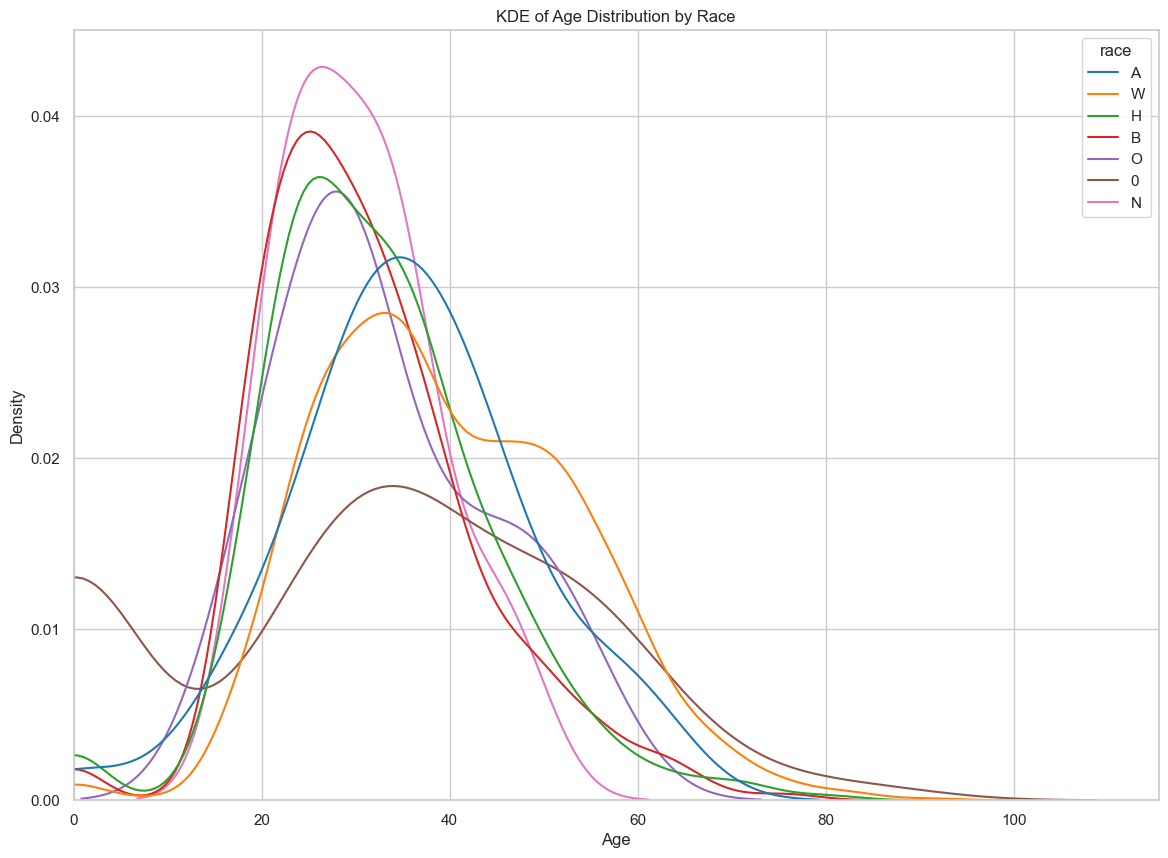

In [51]:
plt.figure(figsize=(14,10))

sns.kdeplot(
    data=df_fatalities,
    x='age',
    hue='race',
    common_norm=False,
    palette='tab10',
)

plt.title('KDE of Age Distribution by Race')
plt.xlabel('Age')
plt.ylabel('Density')
# Ensure legend is added manually
handles, labels = plt.gca().get_legend_handles_labels()
if handles:
    plt.legend(handles, labels, title='Race', loc='upper right')
else:
    print("No legend handles found. Ensure 'hue' parameter is correctly used.")
plt.xlim(left=0)
plt.grid(True)

plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

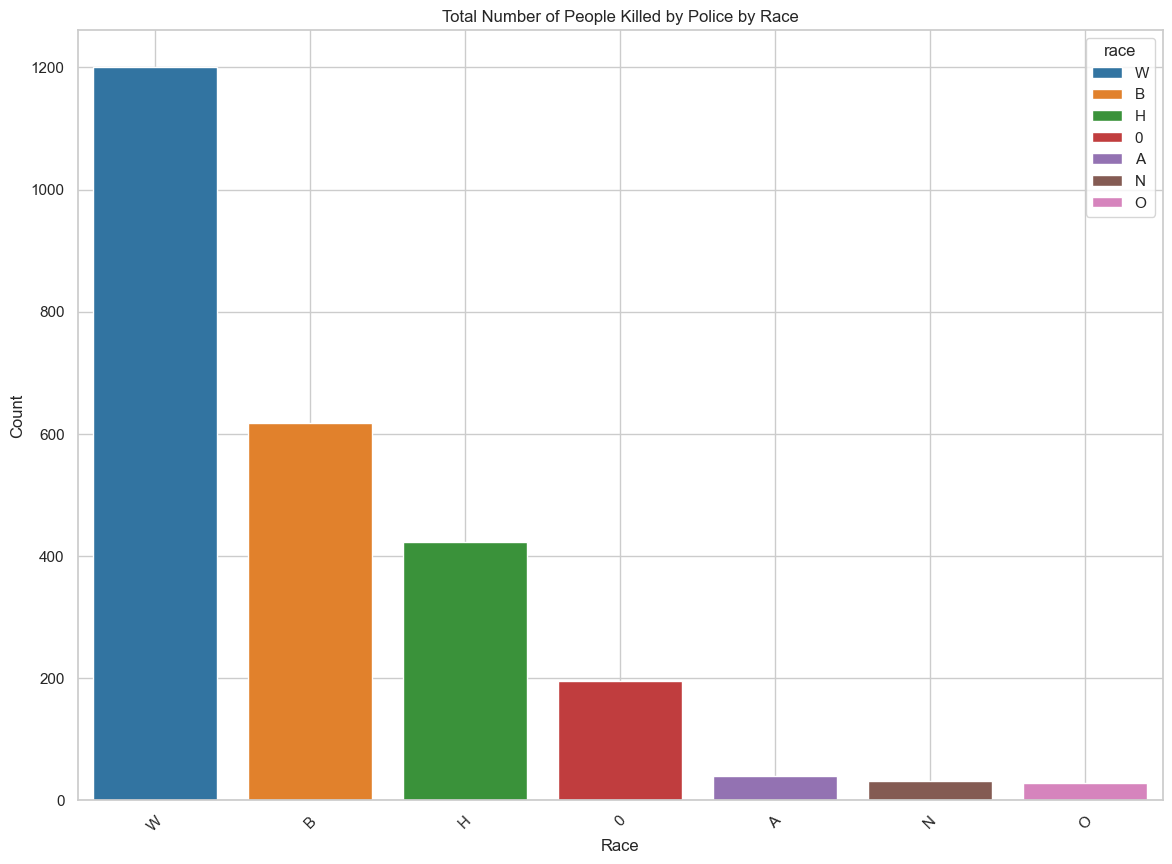

In [56]:
race_counts = df_fatalities['race'].value_counts().reset_index()
race_counts.columns = ['race', 'count']

plt.figure(figsize=(14,10))
sns.barplot(
    data=race_counts,
    x='race',
    y='count',
    hue='race',
    palette='tab10'
)
plt.title('Total Number of People Killed by Police by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [57]:
mental_illness_counts = df_fatalities['signs_of_mental_illness'].value_counts().reset_index()
total_count = df_fatalities.shape[0]

mental_illness_pct = (mental_illness_counts['signs_of_mental_illness'][1] / total_count) * 100

print(f'{mental_illness_pct:.2f}% of people killed by police showed signs of mental illness.')

0.04% of people killed by police showed signs of mental illness.


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [59]:
city_counts = df_fatalities['city'].value_counts().reset_index()
city_counts.columns = ['city', 'count']

top_10_cities = city_counts.head(10)


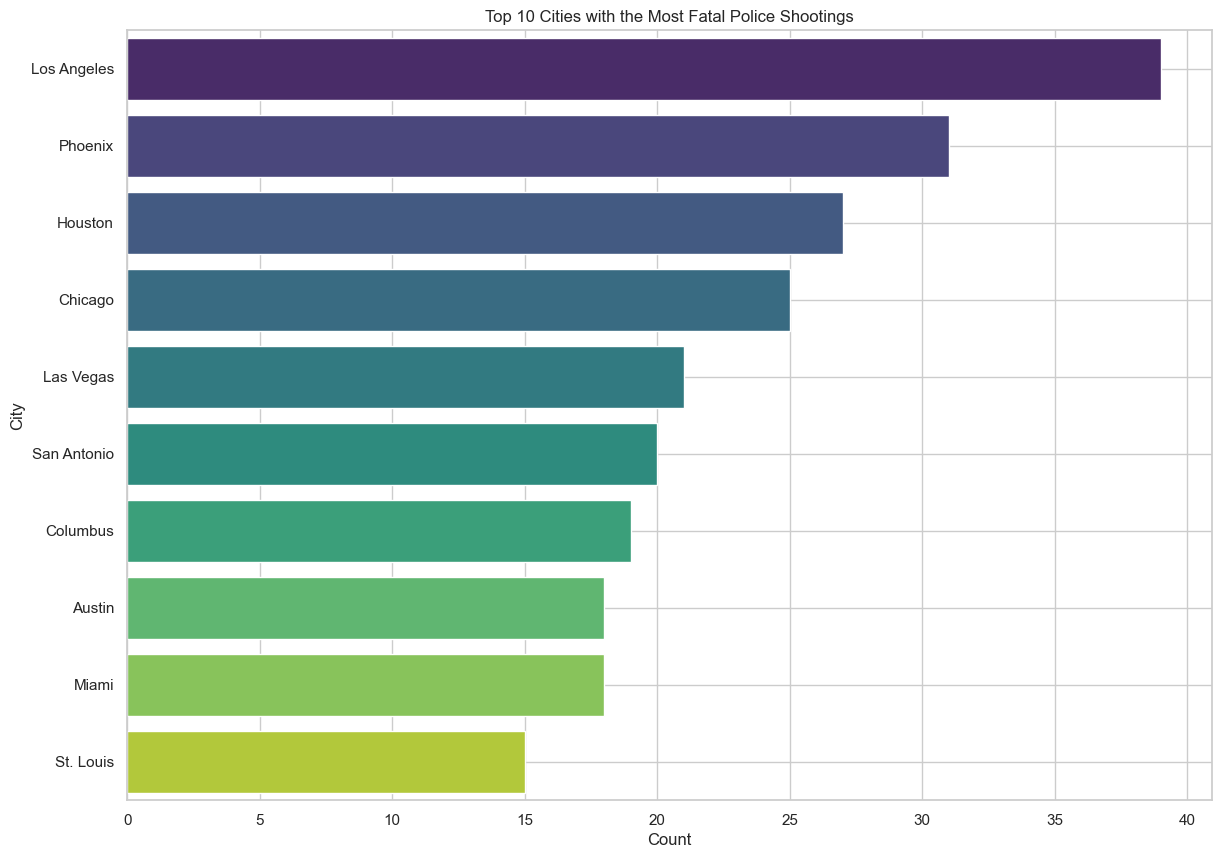

In [62]:
plt.figure(figsize=(14,10))
sns.barplot(
    data=top_10_cities,
    x='count',
    y='city',
    hue='city',
    palette='viridis'
)

plt.title('Top 10 Cities with the Most Fatal Police Shootings')
plt.xlabel('Count')
plt.ylabel('City')
plt.grid(True)

plt.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [64]:
city_counts = df_fatalities['city'].value_counts().reset_index()
city_counts.columns = ['city', 'count']
top_10_cities = city_counts.head(10)['city']

top_10_df = df_fatalities[df_fatalities['city'].isin(top_10_cities)]
race_city_counts = top_10_df.groupby(['city', 'race']).size().unstack(fill_value=0)

total_city_counts = race_city_counts.sum(axis=1)

race_city_share = race_city_counts.div(total_city_counts, axis=0)


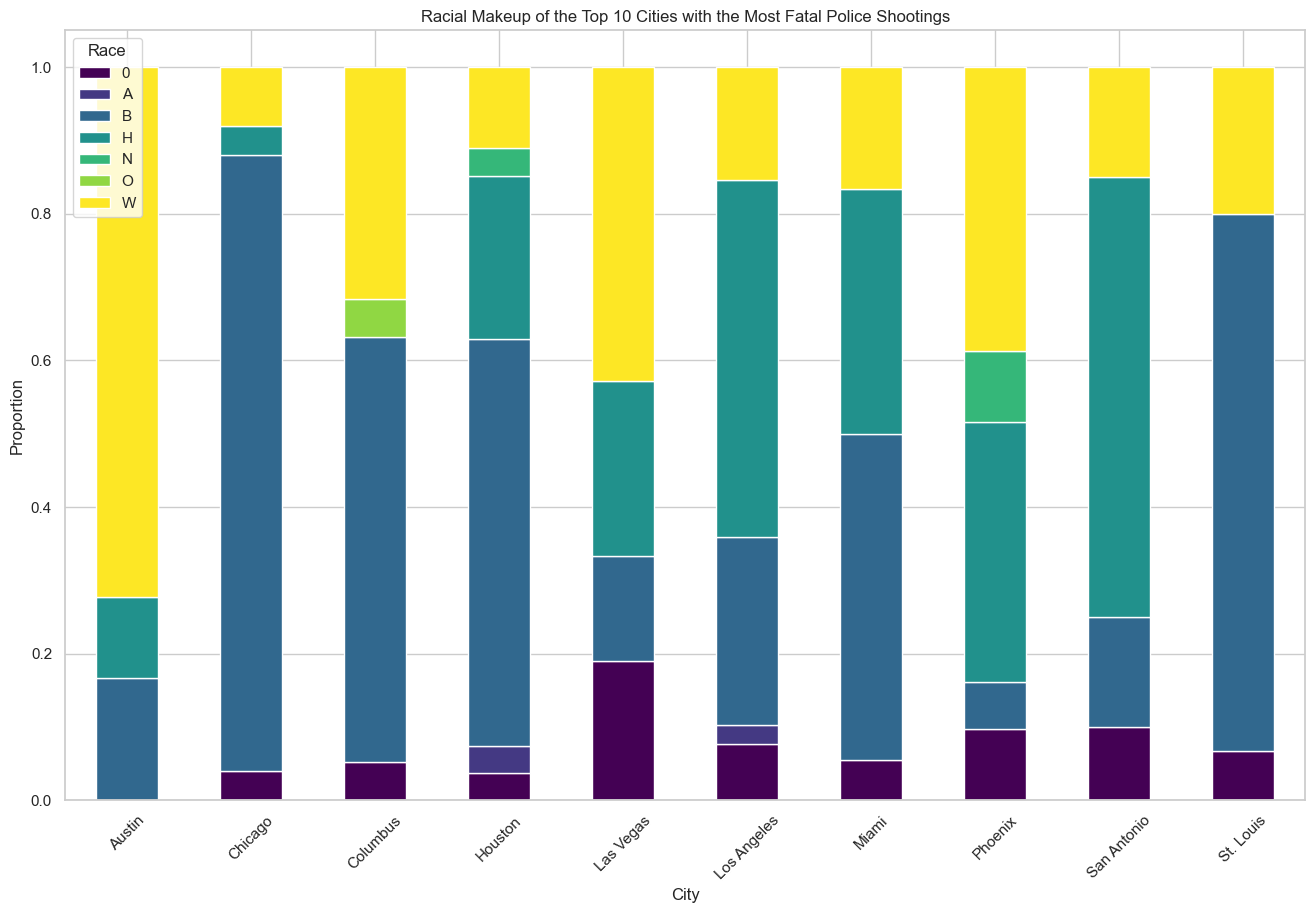

In [65]:
race_city_share.plot(
    kind='bar',
    stacked=True,
    figsize=(16,10),
    colormap='viridis'
)
plt.title('Racial Makeup of the Top 10 Cities with the Most Fatal Police Shootings')
plt.xlabel('City')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Race')
plt.show()


In [67]:
overall_race_counts = df_fatalities['race'].value_counts(normalize=True)
killings_by_race_rate = race_city_counts.div(overall_race_counts, axis=1)


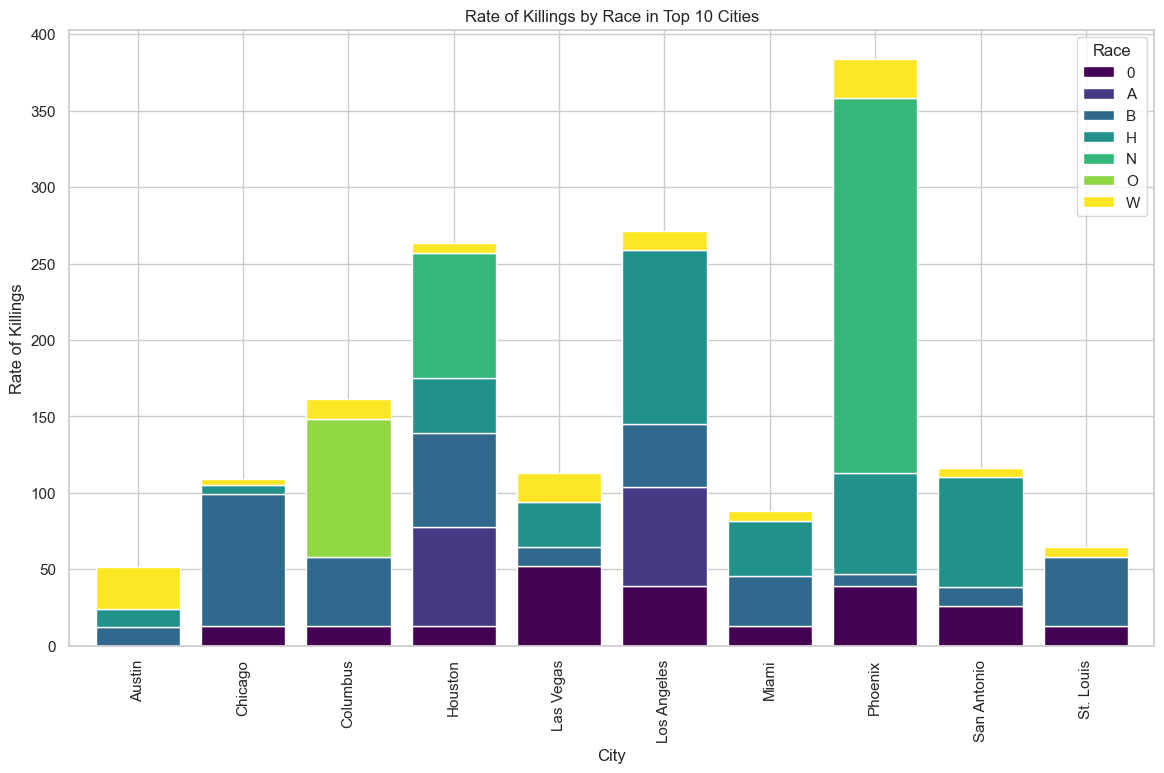

In [73]:
killings_by_race_rate.plot(
    kind='bar', 
    stacked=True,
    figsize=(14, 8),
    colormap='viridis',
    width=0.8
)
plt.title('Rate of Killings by Race in Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Rate of Killings')
plt.legend(title='Race')
plt.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).